In [ ]:
pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25837 sha256=ccdaac82cc68072127ffcc69451dbdcbd3e75c49c3681926e355cae9302c521e
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch
import random
import pandas as pd
import numpy as np
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)

In [ ]:
from tensorflow.keras.datasets import mnist
from imutils import build_montages
import numpy as np
import cv2

### Generating Siamese Pairs

In [ ]:
import os
import random
from itertools import combinations
from typing import List, Tuple

def generate_siamese_pairs(base_path: str, labels: List[int], num_pairs: int) -> List[Tuple[str, str, int]]:
    pairs = []

    label_images = {label: [] for label in labels}
    for label in labels:
        label_path = os.path.join(base_path, str(label))
        label_images[label] = [os.path.join(label_path, img) for img in os.listdir(label_path) if img.endswith(('.png', '.jpg', '.jpeg'))]

    #POSITIVE
    for label in labels:
        images = label_images[label]
        positive_pairs = list(combinations(images, 2))
        pairs.extend((img1, img2, 0) for img1, img2 in random.sample(positive_pairs, min(len(positive_pairs), num_pairs // (2 * len(labels)))))

    #NEGATIVE
    negative_pairs_count = num_pairs - len(pairs)
    while len(pairs) < num_pairs:
        label1, label2 = random.sample(labels, 2)
        img1 = random.choice(label_images[label1])
        img2 = random.choice(label_images[label2])
        pairs.append((img1, img2, 1))

    return random.sample(pairs, num_pairs)


### Function to extract frames from video

In [ ]:
def extract_frames_from_video(video_path, output_folder, frame_rate=5):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    video = cv2.VideoCapture(video_path)
    frame_count = 0
    saved_frame_count = 0
    success, image = video.read()

    while success:
        if frame_count % frame_rate == 0:
            frame_name = os.path.join(output_folder, f"{os.path.basename(video_path).split('.')[0]}_frame_{saved_frame_count}.jpg")
            cv2.imwrite(frame_name, image)
            saved_frame_count += 1

        success, image = video.read()
        frame_count += 1

    video.release()
    print(f"Processed {os.path.basename(video_path)}: {saved_frame_count} frames saved.")

video_folder = '/kaggle/input/few-shot-video-classification/Few Shot video classification/Train/football'
output_folder = '/kaggle/working/extracted_frames/4'

for video_file in os.listdir(video_folder):
    if video_file.endswith('.mp4'):
        video_path = os.path.join(video_folder, video_file)
        extract_frames_from_video(video_path, output_folder)


Processed 24_ftbl.mp4: 76 frames saved.
Processed 12_ftbl.mp4: 92 frames saved.
Processed 23_ftbl.mp4: 75 frames saved.
Processed 02_ftbl.mp4: 92 frames saved.
Processed 16_ftbl.mp4: 87 frames saved.
Processed 21_ftbl.mp4: 73 frames saved.
Processed 22_ftbl.mp4: 72 frames saved.
Processed 11_ftbl.mp4: 90 frames saved.
Processed 25_ftbl.mp4: 74 frames saved.
Processed 18_ftbl.mp4: 91 frames saved.
Processed 17_ftbl.mp4: 91 frames saved.
Processed 15_ftbl.mp4: 91 frames saved.
Processed 26_ftbl.mp4: 75 frames saved.
Processed 20_ftbl.mp4: 77 frames saved.
Processed 08_ftbl.mp4: 87 frames saved.
Processed 10_ftbl.mp4: 85 frames saved.
Processed 14_ftbl.mp4: 84 frames saved.
Processed 09_ftbl.mp4: 83 frames saved.
Processed 13_ftbl.mp4: 87 frames saved.
Processed 07_ftbl.mp4: 86 frames saved.
Processed 19_ftbl.mp4: 78 frames saved.
Processed 28_ftbl.mp4: 89 frames saved.
Processed 04_ftbl.mp4: 87 frames saved.
Processed 06_ftbl.mp4: 90 frames saved.
Processed 01_ftbl.mp4: 90 frames saved.


In [ ]:
video_folder = '/kaggle/input/few-shot-video-classification/Few Shot video classification/Train/judo'
output_folder = '/kaggle/working/extracted_frames/5'

for video_file in os.listdir(video_folder):
    if video_file.endswith('.mp4'):
        video_path = os.path.join(video_folder, video_file)
        extract_frames_from_video(video_path, output_folder)

Processed judo_sample_3.mp4: 75 frames saved.
Processed judo_sample_1.mp4: 76 frames saved.
Processed judo_sample_7.mp4: 75 frames saved.
Processed judo_sample_8.mp4: 75 frames saved.
Processed judo_sample_0.mp4: 75 frames saved.
Processed judo_sample_33.mp4: 75 frames saved.
Processed judo_sample_20.mp4: 75 frames saved.
Processed judo_sample_6.mp4: 75 frames saved.
Processed judo_sample_5.mp4: 75 frames saved.
Processed judo_sample_15.mp4: 75 frames saved.
Processed judo_sample_29.mp4: 75 frames saved.
Processed judo_sample_34.mp4: 75 frames saved.
Processed judo_sample_19.mp4: 75 frames saved.
Processed judo_sample_22.mp4: 75 frames saved.
Processed judo_sample_14.mp4: 75 frames saved.
Processed judo_sample_11.mp4: 75 frames saved.
Processed judo_sample_4.mp4: 75 frames saved.
Processed judo_sample_31.mp4: 75 frames saved.
Processed judo_sample_18.mp4: 75 frames saved.
Processed judo_sample_12.mp4: 75 frames saved.
Processed judo_sample_9.mp4: 75 frames saved.
Processed judo_sample_

In [ ]:

video_folder = '/kaggle/input/few-shot-video-classification/Few Shot video classification/Train/rugby'
output_folder = '/kaggle/working/extracted_frames/6'

for video_file in os.listdir(video_folder):
    if video_file.endswith('.mp4'):
        video_path = os.path.join(video_folder, video_file)
        extract_frames_from_video(video_path, output_folder)


Processed Clip 14.mp4: 102 frames saved.
Processed Clip 15.mp4: 90 frames saved.
Processed Clip 27.mp4: 96 frames saved.
Processed Clip 11.mp4: 99 frames saved.
Processed Clip 23.mp4: 101 frames saved.
Processed Clip 30.mp4: 93 frames saved.
Processed Clip 21.mp4: 87 frames saved.
Processed Clip 2.mp4: 95 frames saved.
Processed Clip 25.mp4: 108 frames saved.
Processed Clip 20.mp4: 102 frames saved.
Processed Clip 28.mp4: 101 frames saved.
Processed Clip 29.mp4: 98 frames saved.
Processed Clip 17.mp4: 94 frames saved.
Processed Clip 13.mp4: 95 frames saved.
Processed Clip 10.mp4: 95 frames saved.
Processed Clip 16.mp4: 90 frames saved.
Processed Clip 6.mp4: 96 frames saved.
Processed Clip 12.mp4: 85 frames saved.
Processed Clip 9.mp4: 92 frames saved.
Processed Clip 19.mp4: 83 frames saved.
Processed Clip 3.mp4: 96 frames saved.
Processed Clip 18.mp4: 93 frames saved.
Processed Clip 4.mp4: 92 frames saved.
Processed Clip 5.mp4: 95 frames saved.
Processed Clip 7.mp4: 81 frames saved.
Pr

In [ ]:
video_folder = '/kaggle/input/few-shot-video-classification/Few Shot video classification/Train/squash'
output_folder = '/kaggle/working/extracted_frames/7'

for video_file in os.listdir(video_folder):
    if video_file.endswith('.mp4'):
        video_path = os.path.join(video_folder, video_file)
        extract_frames_from_video(video_path, output_folder)

Processed Clip 14.mp4: 75 frames saved.
Processed Clip 15.mp4: 75 frames saved.
Processed Clip 27.mp4: 75 frames saved.
Processed Clip 11.mp4: 75 frames saved.
Processed Clip 23.mp4: 150 frames saved.
Processed Clip 30.mp4: 75 frames saved.
Processed Clip 21.mp4: 90 frames saved.
Processed Clip 2.mp4: 75 frames saved.
Processed Clip 25.mp4: 75 frames saved.
Processed Clip 20.mp4: 150 frames saved.
Processed Clip 28.mp4: 150 frames saved.
Processed Clip 29.mp4: 75 frames saved.
Processed Clip 17.mp4: 75 frames saved.
Processed Clip 13.mp4: 150 frames saved.
Processed Clip 10.mp4: 90 frames saved.
Processed Clip 16.mp4: 75 frames saved.
Processed Clip 6.mp4: 90 frames saved.
Processed Clip 12.mp4: 75 frames saved.
Processed Clip 9.mp4: 150 frames saved.
Processed Clip 19.mp4: 90 frames saved.
Processed Clip 3.mp4: 75 frames saved.
Processed Clip 18.mp4: 75 frames saved.
Processed Clip 4.mp4: 75 frames saved.
Processed Clip 5.mp4: 150 frames saved.
Processed Clip 7.mp4: 150 frames saved.


In [ ]:
video_folder = '/kaggle/input/few-shot-video-classification/Few Shot video classification/Train/wrestling'
output_folder = '/kaggle/working/extracted_frames/8'

for video_file in os.listdir(video_folder):
    if video_file.endswith('.mp4'):
        video_path = os.path.join(video_folder, video_file)
        extract_frames_from_video(video_path, output_folder)

Processed Clip 14.mp4: 32 frames saved.
Processed Clip 15.mp4: 32 frames saved.
Processed Clip 27.mp4: 33 frames saved.
Processed Clip 11.mp4: 32 frames saved.
Processed Clip 23.mp4: 34 frames saved.
Processed Clip 30.mp4: 33 frames saved.
Processed Clip 21.mp4: 32 frames saved.
Processed Clip 2.mp4: 32 frames saved.
Processed Clip 25.mp4: 33 frames saved.
Processed Clip 20.mp4: 32 frames saved.
Processed Clip 28.mp4: 35 frames saved.
Processed Clip 29.mp4: 38 frames saved.
Processed Clip 17.mp4: 33 frames saved.
Processed Clip 13.mp4: 20 frames saved.
Processed Clip 10.mp4: 32 frames saved.
Processed Clip 16.mp4: 32 frames saved.
Processed Clip 6.mp4: 32 frames saved.
Processed Clip 12.mp4: 32 frames saved.
Processed Clip 9.mp4: 32 frames saved.
Processed Clip 19.mp4: 32 frames saved.
Processed Clip 3.mp4: 35 frames saved.
Processed Clip 18.mp4: 33 frames saved.
Processed Clip 4.mp4: 34 frames saved.
Processed Clip 5.mp4: 33 frames saved.
Processed Clip 7.mp4: 33 frames saved.
Process

In [ ]:
base_path = "/kaggle/working/extracted_frames"
labels = list(range(4, 9))
num_pairs = 10000

pairs = generate_siamese_pairs(base_path, labels, num_pairs)

for i, (img1, img2, label) in enumerate(pairs[:15]):
    print(f"Pair {i+1}: {img1} - {img2} (Label: {label})")

Pair 1: /kaggle/working/extracted_frames/6/Clip 28_frame_8.jpg - /kaggle/working/extracted_frames/7/Clip 6_frame_83.jpg (Label: 1)
Pair 2: /kaggle/working/extracted_frames/8/Clip 6_frame_8.jpg - /kaggle/working/extracted_frames/8/Clip 30_frame_17.jpg (Label: 0)
Pair 3: /kaggle/working/extracted_frames/7/Clip 15_frame_74.jpg - /kaggle/working/extracted_frames/6/Clip 24_frame_49.jpg (Label: 1)
Pair 4: /kaggle/working/extracted_frames/7/Clip 2_frame_4.jpg - /kaggle/working/extracted_frames/6/Clip 30_frame_91.jpg (Label: 1)
Pair 5: /kaggle/working/extracted_frames/8/Clip 21_frame_24.jpg - /kaggle/working/extracted_frames/7/Clip 9_frame_0.jpg (Label: 1)
Pair 6: /kaggle/working/extracted_frames/6/Clip 1_frame_79.jpg - /kaggle/working/extracted_frames/8/Clip 20_frame_6.jpg (Label: 1)
Pair 7: /kaggle/working/extracted_frames/5/judo_sample_5_frame_46.jpg - /kaggle/working/extracted_frames/8/Clip 8_frame_19.jpg (Label: 1)
Pair 8: /kaggle/working/extracted_frames/8/Clip 29_frame_6.jpg - /kaggle/w

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

In [ ]:
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 64, 10),  # Output: 64 x 91 x 91
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # Output: 64 x 45 x 45
            nn.Conv2d(64, 128, 7),  # Output: 128 x 39 x 39
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # Output: 128 x 19 x 19
            nn.Conv2d(128, 128, 4),  # Output: 128 x 16 x 16
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # Output: 128 x 8 x 8
            nn.Conv2d(128, 256, 4),  # Output: 256 x 5 x 5
            nn.ReLU(inplace=True),
        )
        self.fc = nn.Sequential(
            nn.Linear(256 * 5 * 5, 4096),
            nn.Sigmoid()
        )

    def forward_one(self, x):
        x = self.conv(x)
        x = x.view(x.size()[0], -1)
        x = self.fc(x)
        return x

    def forward(self, x1, x2):
        out1 = self.forward_one(x1)
        out2 = self.forward_one(x2)
        return out1, out2

In [ ]:
class SiameseDataset(Dataset):
    def __init__(self, pairs, transform=None):
        self.pairs = pairs
        self.transform = transform

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        img1_path, img2_path, label = self.pairs[idx]
        img1 = Image.open(img1_path).convert("RGB")
        img2 = Image.open(img2_path).convert("RGB")

        if self.transform:
            img1 = self.transform(img1)
            img2 = self.transform(img2)

        return img1, img2, torch.FloatTensor([label])

In [ ]:
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = F.pairwise_distance(output1, output2)
        loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
                                      (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        return loss_contrastive

In [ ]:
import matplotlib.pyplot as plt

def train_siamese_network(model, train_loader, num_epochs=20):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    criterion = ContrastiveLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5)


    train_losses = []

    for epoch in range(num_epochs):
        epoch_loss = 0
        for i, (img1, img2, label) in enumerate(train_loader):
            img1, img2, label = img1.to(device), img2.to(device), label.to(device)
            optimizer.zero_grad()
            output1, output2 = model(img1, img2)
            loss = criterion(output1, output2, label)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")

        scheduler.step(avg_loss)

        current_lr = scheduler.optimizer.param_groups[0]['lr']
        print(f"Learning rate after epoch {epoch + 1}: {current_lr:.6f}")

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs + 1), train_losses, marker='o')
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

    torch.save(model.state_dict(), 'siamese_network_model.pth')


Epoch [1/20], Loss: 1.0857
Learning rate after epoch 1: 0.000100
Epoch [2/20], Loss: 1.0500
Learning rate after epoch 2: 0.000100
Epoch [3/20], Loss: 1.0320
Learning rate after epoch 3: 0.000100
Epoch [4/20], Loss: 1.0304
Learning rate after epoch 4: 0.000100
Epoch [5/20], Loss: 1.0250
Learning rate after epoch 5: 0.000100
Epoch [6/20], Loss: 1.0261
Learning rate after epoch 6: 0.000100
Epoch [7/20], Loss: 1.0225
Learning rate after epoch 7: 0.000100
Epoch [8/20], Loss: 1.0211
Learning rate after epoch 8: 0.000100
Epoch [9/20], Loss: 1.0217
Learning rate after epoch 9: 0.000100
Epoch [10/20], Loss: 1.0215
Learning rate after epoch 10: 0.000100
Epoch [11/20], Loss: 1.0167
Learning rate after epoch 11: 0.000100
Epoch [12/20], Loss: 1.0230
Learning rate after epoch 12: 0.000100
Epoch [13/20], Loss: 1.0189
Learning rate after epoch 13: 0.000100
Epoch [14/20], Loss: 1.0159
Learning rate after epoch 14: 0.000100
Epoch [15/20], Loss: 1.0161
Learning rate after epoch 15: 0.000100
Epoch [16/20]

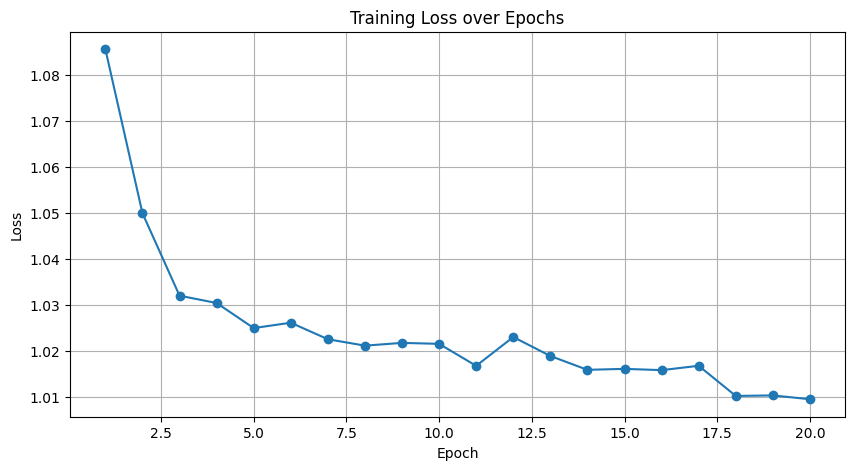

In [ ]:
transform = transforms.Compose([
        transforms.Resize((100, 100)),
        transforms.ToTensor(),
    ])


dataset = SiameseDataset(pairs, transform=transform)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

model = SiameseNetwork()
train_siamese_network(model, train_loader)

In [ ]:
def process_frames(frame_folder, transform):
    frames = []
    for frame_name in sorted(os.listdir(frame_folder)):
        frame_path = os.path.join(frame_folder, frame_name)
        image = Image.open(frame_path).convert('RGB')
        frames.append(transform(image))
    return torch.stack(frames)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
support_base_path = '/kaggle/input/few-shot-video-classification/Few Shot video classification/Test/Support-set'
support_set = []

for label in range(4):
    label_path = os.path.join(support_base_path, str(label))
    video_files = [f for f in os.listdir(label_path) if f.endswith(('.mp4', '.avi', '.mov'))]
    if video_files:
        video_path = os.path.join(label_path, video_files[0])


        support_output_folder = f'./support_frames/label_{label}'
        extract_frames_from_video(video_path, support_output_folder)

        support_frames = process_frames(support_output_folder, transform)
        support_frames = support_frames.to(device)
        with torch.no_grad():
            support_embedding = model.forward_one(support_frames).mean(dim=0)  # Average frame embeddings
        support_set.append((support_embedding, label))

query_base_path = "/kaggle/input/few-shot-video-classification/Few Shot video classification/Test/Query"
query_predictions = []

for query_video_name in os.listdir(query_base_path):
    if query_video_name.endswith(('.mp4', '.avi', '.mov')):
        query_video_path = os.path.join(query_base_path, query_video_name)

        query_output_folder = f'./query_frames/{query_video_name.split(".")[0]}'
        extract_frames_from_video(query_video_path, query_output_folder)

        query_frames = process_frames(query_output_folder, transform)
        query_frames = query_frames.to(device)
        with torch.no_grad():
            query_embedding = model.forward_one(query_frames).mean(dim=0)

        distances = []
        for support_embedding, label in support_set:
            distance = F.pairwise_distance(query_embedding.unsqueeze(0), support_embedding.unsqueeze(0))
            distances.append((distance.item(), label))

        # Find the closest support video
        predicted_label = min(distances, key=lambda x: x[0])[1]
        query_predictions.append((query_video_name, predicted_label))

# Save predictions to CSV file
df = pd.DataFrame(query_predictions, columns=["Video", "Predicted Label"])
df.to_csv("submission.csv", index=False)

print("Predictions saved to submission.csv")

Processed clip1.mov: 176 frames saved.
Processed clip1.mov: 225 frames saved.
Processed clip1.mov: 182 frames saved.
Processed clip1.mov: 226 frames saved.
Processed clip_668.mp4: 49 frames saved.
Processed clip_40.mp4: 25 frames saved.
Processed clip_633.mp4: 49 frames saved.
Processed clip_851.mp4: 49 frames saved.
Processed clip_729.mp4: 25 frames saved.
Processed clip_883.mp4: 25 frames saved.
Processed clip_196.mp4: 49 frames saved.
Processed clip_278.mp4: 49 frames saved.
Processed clip_554.mp4: 49 frames saved.
Processed clip_926.mp4: 49 frames saved.
Processed clip_931.mp4: 49 frames saved.
Processed clip_537.mp4: 25 frames saved.
Processed clip_929.mp4: 25 frames saved.
Processed clip_624.mp4: 49 frames saved.
Processed clip_864.mp4: 49 frames saved.
Processed clip_584.mp4: 25 frames saved.
Processed clip_244.mp4: 49 frames saved.
Processed clip_22.mp4: 49 frames saved.
Processed clip_276.mp4: 49 frames saved.
Processed clip_868.mp4: 49 frames saved.
Processed clip_349.mp4: 49

In [ ]:
df = pd.read_csv('/kaggle/working/submission.csv')

In [ ]:
df = df.rename(columns={'Video': 'VID_ID', 'Predicted Class': 'LABEL'})
df['VID_ID'] = df['VID_ID'].str.extract(r'clip_(\d+)\.mp4').astype(int)
df.to_csv('/kaggle/working/00001_20ep_fluc.csv', index=False)

In [ ]:
df

,VID_ID,Predicted Label
0,668,1
1,40,2
2,633,1
3,851,2
4,729,2
...,...,...
225,583,2
226,647,2
227,8,2
228,142,2
